> # **Step 1: Preprocessing Arabic and English Texts**

**Purpose:**  
- To clean and prepare the Arabic and English texts for Word2Vec training by removing noise and standardizing formats.

**Key Steps:**  
1. **Normalization**: Converts text to lowercase and normalizes characters (e.g., "ى" to "ي"). This ensures consistency and reduces vocabulary size.
2. **Tokenization**: Splits text into individual words or tokens for further processing.
3. **Stopword Removal**: Removes common words that don’t contribute to the meaning of a sentence (e.g., "and", "في").
4. **Spelling Correction**: Fixes typos and abbreviations, ensuring a clean vocabulary for Word2Vec.
5. **Handling Mixed Languages**: Separates and handles Arabic and English words properly to reduce noise.

**Challenges:**  
- Arabic diacritics (e.g., "كَتَبَ" vs. "كتب") can create multiple forms of the same word, increasing vocabulary size unnecessarily.
- Limited Arabic stopword lists compared to English require manual addition or customization.


**a. Normalization**


In [ ]:
!pip install camel-tools

In [ ]:
# For English
text_english = "Hello, h0w are you doin today? It's been awhile since we've talked!"
text_english = text_english.lower()
print(text_english)
# For Arabic
from camel_tools.utils.dediac import dediac_ar

# Example Arabic text
text_arabic = "السَّلامُ علَيكُم! اليومُ هوَ يَومٌ جَميلٌ in Cairo."

# Remove diacritics
text_arabic_cleaned = dediac_ar(text_arabic)
print(text_arabic_cleaned)

hello, h0w are you doin today? it's been awhile since we've talked!
السلام عليكم! اليوم هو يوم جميل in Cairo.


**b. Tokenization**

In [ ]:
import spacy

# Load language models for English and Arabic
nlp_en = spacy.load("en_core_web_sm")
nlp_ar = spacy.blank("ar")  # spaCy supports Arabic tokenization, but tagging requires more tools

# Tokenization function
def tokenize_text(text, nlp_model):
    doc = nlp_model(text)
    tokens = [token.text for token in doc]
    return tokens

tokens_en = tokenize_text(text_english, nlp_en)
tokens_ar = tokenize_text(text_arabic_cleaned, nlp_ar)

print("English Tokens:", tokens_en)
print("Arabic Tokens:", tokens_ar)

English Tokens: ['hello', ',', 'h0w', 'are', 'you', 'doin', 'today', '?', 'it', "'s", 'been', 'awhile', 'since', 'we', "'ve", 'talked', '!']
Arabic Tokens: ['السلام', 'عليكم', '!', 'اليوم', 'هو', 'يوم', 'جميل', 'in', 'Cairo.']


**c. Stopword Removal**


In [ ]:
# English and Arabic stopword removal
from spacy.lang.en.stop_words import STOP_WORDS as EN_STOPWORDS
from spacy.lang.ar.stop_words import STOP_WORDS as AR_STOPWORDS

def remove_stopwords(tokens, stopwords):
    return [token for token in tokens if token.lower() not in stopwords]

filtered_en = remove_stopwords(tokens_en, EN_STOPWORDS)
filtered_ar = remove_stopwords(tokens_ar, EN_STOPWORDS)
filtered_ar = remove_stopwords(tokens_ar, AR_STOPWORDS)

print("Filtered English Tokens:", filtered_en)
print("Filtered Arabic Tokens:", filtered_ar)


Filtered English Tokens: ['hello', ',', 'h0w', 'doin', 'today', '?', 'awhile', 'talked', '!']
Filtered Arabic Tokens: ['السلام', 'عليكم', '!', 'جميل', 'in', 'Cairo.']


**d. Noice Removal**

In [ ]:
import string

punctuation = string.punctuation

cleaned_ar = [word for word in filtered_ar if word not in punctuation]
cleaned_en = [word for word in filtered_en if word not in punctuation]

# showing The Punctuation
print("Punctuation Elements :",punctuation)

# Display tokens after removing punctuation
print("\n\nFiltered Arabic Tokens without Punctuation:", cleaned_ar)
print("\nFiltered English Tokens without Punctuation:", cleaned_en)

Punctuation Elements : !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Filtered Arabic Tokens without Punctuation: ['السلام', 'عليكم', 'جميل', 'in', 'Cairo.']

Filtered English Tokens without Punctuation: ['hello', 'h0w', 'doin', 'today', 'awhile', 'talked']


In [ ]:
!pip install pyspellchecker

**e. Spelling Correction**

In [ ]:
# For English
from spellchecker import SpellChecker

spell = SpellChecker()
tokens_english = [spell.correction(word) for word in cleaned_en]
print(tokens_english)
# For Arabic
# Initialize SpellChecker for Arabic
spell = SpellChecker(language='ar')

def correct_spelling_arabic(text):
    corrected_words = [spell.correction(word) or word for word in text]
    return corrected_words

# Example text
tokens_arabic = correct_spelling_arabic(cleaned_ar)
print(tokens_arabic)


['hello', 'how', 'down', 'today', 'awhile', 'talked']
['السلام', 'عليكم', 'جميل', 'من', 'Cairo.']


**f. Handle Mixed Languages**

In [ ]:
import re

# For Arabic text
arabic_words = [word for word in tokens_arabic if re.search(r'[\u0600-\u06FF]', word)]
english_words_in_arabic = [word for word in tokens_arabic if re.search(r'[a-zA-Z]', word)]

print("Arabic Words:", arabic_words)
print("English Words in Arabic Text:", english_words_in_arabic)


Arabic Words: ['السلام', 'عليكم', 'جميل', 'من']
English Words in Arabic Text: ['Cairo.']


> # **Step 2: Training the Word2Vec Model**

**Purpose:**  
- Create vector representations for words based on their context in the cleaned text.

**Key Parameters:**  
- `vector_size`: The dimensionality of word embeddings. Higher values capture more semantic nuances but need more data.
- `window`: The context window size around each target word, determining the local or broad context relationships.
- `min_count`: Minimum word frequency for inclusion in the vocabulary.

**Challenges:**  
- Small datasets may lead to less meaningful embeddings for infrequent words. Consider pretraining on larger datasets or using pretrained embeddings.


In [ ]:
from gensim.models import Word2Vec

# Prepare your corpus
sentences = [arabic_words, tokens_english]  # List of tokenized sentences
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

> # **Step 3: Extracting Word Embeddings**

**Purpose:**  
- Retrieve vector representations for specific words, which can be used for downstream tasks like classification or clustering.

**Challenges:**  
- Words not seen during training (e.g., rare words or those removed in preprocessing) will not have embeddings.


In [ ]:
# Access the word vectors
word_vectors = model.wv

# Extract embeddings for selected words
words_to_extract = ["السلام", "عليكم", "hello", "today", "جميل"]

for word in words_to_extract:
    if word in word_vectors:  # Ensure the word exists in the vocabulary
        print(f"Embedding for '{word}':\n{word_vectors[word]}\n")
    else:
        print(f"'{word}' is not in the vocabulary.\n")

Embedding for 'السلام':
[-9.5785465e-03  8.9431154e-03  4.1650687e-03  9.2347348e-03
  6.6435025e-03  2.9247368e-03  9.8040197e-03 -4.4246409e-03
 -6.8033109e-03  4.2273807e-03  3.7290000e-03 -5.6646108e-03
  9.7047603e-03 -3.5583067e-03  9.5494064e-03  8.3472609e-04
 -6.3384566e-03 -1.9771170e-03 -7.3770545e-03 -2.9795230e-03
  1.0416972e-03  9.4826873e-03  9.3558477e-03 -6.5958775e-03
  3.4751510e-03  2.2755705e-03 -2.4893521e-03 -9.2291720e-03
  1.0271263e-03 -8.1657059e-03  6.3201892e-03 -5.8000805e-03
  5.5354391e-03  9.8337233e-03 -1.6000033e-04  4.5284927e-03
 -1.8094003e-03  7.3607611e-03  3.9400971e-03 -9.0103243e-03
 -2.3985039e-03  3.6287690e-03 -9.9568366e-05 -1.2012708e-03
 -1.0554385e-03 -1.6716016e-03  6.0495257e-04  4.1650953e-03
 -4.2527914e-03 -3.8336217e-03 -5.2816868e-05  2.6935578e-04
 -1.6880632e-04 -4.7855065e-03  4.3134023e-03 -2.1719194e-03
  2.1035396e-03  6.6652300e-04  5.9696771e-03 -6.8423809e-03
 -6.8157101e-03 -4.4762576e-03  9.4358288e-03 -1.5918827e-03


> # **Step 4: Visualizing Word Embeddings**

**Purpose:**  
- Use dimensionality reduction techniques (PCA or t-SNE) to visualize high-dimensional word embeddings in 2D space.

**Justification:**  
- Visualization helps verify the quality of embeddings. Words with similar meanings or contexts should cluster together.

**Challenges:**  
- PCA captures only linear relationships, while t-SNE is better for non-linear relationships but computationally intensive.


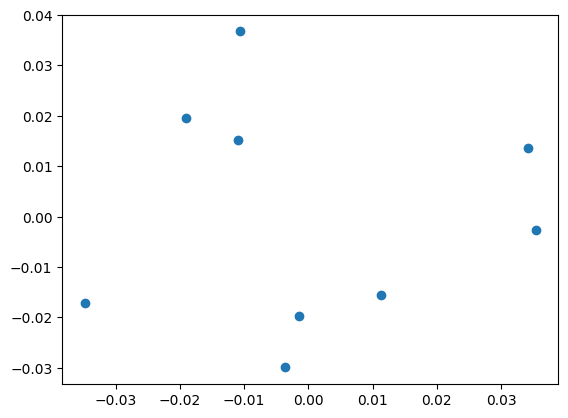

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 dimensions
pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(word_vectors.vectors)

# Scatter plot
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1])
plt.show()